In [3]:
# Установка библиотек
library(dplyr)
library(magrittr)
library(readr)
library(tidyr)
library(stringr)
library(lubridate)
library(openxlsx)
library(ggplot2)

Warning message:
"пакет 'dplyr' был собран под R версии 4.4.3"

Присоединяю пакет: 'dplyr'


Следующие объекты скрыты от 'package:stats':

    filter, lag


Следующие объекты скрыты от 'package:base':

    intersect, setdiff, setequal, union



Присоединяю пакет: 'tidyr'


Следующий объект скрыт от 'package:magrittr':

    extract



Присоединяю пакет: 'lubridate'


Следующие объекты скрыты от 'package:base':

    date, intersect, setdiff, union


Warning message:
"пакет 'openxlsx' был собран под R версии 4.4.3"
Warning message:
"пакет 'ggplot2' был собран под R версии 4.4.3"


In [5]:
# На основе это функции, выполняеться чтение табличных данных из папки
read_data <- function(file) {
  if (file.exists(file)) {
    read_csv(file)
  } else {
    message(paste("Данные отсутствуют:", file))
    NULL
  }
}

In [69]:
# Применяю функцию к данным
financial_data <- read_data("financial_data.csv")
prolongations <- read_data("prolongations.csv")

Rows: 451 Columns: 19
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (18): Причина дубля, Ноябрь 2022, Декабрь 2022, Январь 2023, Февраль 202...
dbl  (1): id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 477 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): month, AM
dbl (1): id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [71]:
# Просмотр первых 10 строк
head(financial_data, 10)
head(prolongations, 10)

id,Причина дубля,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024,Account
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
42,NA,"36 220,00",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Васильев Артем Александрович
657,первая часть оплаты,стоп,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Васильев Артем Александрович
657,вторая часть оплаты,стоп,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Васильев Артем Александрович
594,NA,стоп,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Васильев Артем Александрович
665,NA,"10 000,00",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Васильев Артем Александрович
637,NA,"38 045,00",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Соколова Анастасия Викторовна
419,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Михайлов Андрей Сергеевич
578,NA,"82 800,00",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Попова Екатерина Николаевна
579,NA,в ноль,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Васильев Артем Александрович


id,month,AM
<dbl>,<chr>,<chr>
42,ноябрь 2022,Васильев Артем Александрович
453,ноябрь 2022,Васильев Артем Александрович
548,ноябрь 2022,Михайлов Андрей Сергеевич
87,ноябрь 2022,Соколова Анастасия Викторовна
429,ноябрь 2022,Соколова Анастасия Викторовна
600,ноябрь 2022,Васильев Артем Александрович
657,ноябрь 2022,Васильев Артем Александрович
594,ноябрь 2022,Васильев Артем Александрович
665,ноябрь 2022,Васильев Артем Александрович


In [73]:
# Чтобы было удобне работать с табличными данными, преобразовал табличные данные из широкого в узкий формат
financial_long <- function(df){
  df %>% 
    pivot_longer(
    cols = -c("id", "Причина дубля", "Account"),
    names_to = "month",
    values_to = "shipment"
  )
}

In [75]:
# Применяю функцию к датафрейму
financial_transform <- financial_long(financial_data)


In [77]:
# Трансформирую колонки "shipment, month"
# По условию заменяю "в ноль" на последнюю ненулевую отгрузку
# Также заменяю все "стоп", "end" на NA
financial_replacement <- function(df) { 
  df %>%
    arrange(id, month) %>%  
    group_by(id) %>%
    mutate(
      month_raw = str_to_title(str_trim(month)),
      year = str_extract(month_raw, "\\d{4}"),
      month = str_extract(month_raw, "^[А-Яа-я]+"),  
      shipment = str_replace_all(shipment, ",", "."),
      shipment = str_replace_all(shipment, "\\s+", ""),
      shipment = ifelse(shipment == "в ноль", "0", shipment),
      shipment = ifelse(shipment %in% c("стоп", "end", ""), NA, shipment),
      shipment = str_extract(shipment, "[0-9 .,]+"),
      shipment = as.numeric(shipment),
      shipment = ifelse(shipment == 0 & all(shipment == 0), lag(shipment, default = 0), shipment),
      shipment = ifelse(is.na(shipment), 0, shipment)
    ) %>%
    select(-month_raw) %>% 
    ungroup()
}

In [79]:
# Применяю функцию к датафрейму
financial_finaly <- financial_replacement(financial_transform)

In [81]:
# Выполняеться левое обьединение с таблицей пролонгаций по полю id
# Если поле AM (тоисть ФИО менеджера) из таблицы "prolongations" равно NA, заменяю на поле из таблицы "financial_finaly", в противном случае оставляем "AM - ФИО"
# Группирую по "ID, AM, month"
# Произвожу вычисление по сумме отгрузки
financiall_full <- financial_finaly %>%
  left_join(prolongations %>% select(id, AM), by = "id", relationship = "many-to-many") %>%
  mutate(AM = ifelse(is.na(AM), Account, AM)) %>% 
  group_by(id, AM, month, year) %>%
  summarise(shipment = sum(shipment, na.rm = TRUE), .groups = "drop") %>%
  ungroup()

In [83]:
# Данная функция на вход берёт общий датафрейм, месяц, год
# Расчитывает 2-а коэффициента согласно условию 
calc_coef <- function(df, month_current, year_current) {
  months_order <- c("Январь","Февраль","Март","Апрель","Май",
                    "Июнь","Июль","Август","Сентябрь","Октябрь",
                    "Ноябрь","Декабрь")
  
  idx <- match(month_current, months_order)
  month_prev1 <- if(idx > 1) months_order[idx-1] else NA
  month_prev2 <- if(idx > 2) months_order[idx-2] else NA
  
  df %>%
    filter(year == as.character(year_current)) %>%
    group_by(AM) %>%
    summarise(
      coef1 = {
        prev1_vals <- shipment[month == month_prev1]
        current_vals <- shipment[month == month_current & id %in% id[month == month_prev1]]
        if(length(prev1_vals)==0 || sum(prev1_vals, na.rm = TRUE)==0) NA
        else sum(current_vals, na.rm = TRUE)/sum(prev1_vals, na.rm = TRUE)
      },
      coef2 = {
        prev2_vals <- shipment[month == month_prev2]
        ids_prev1 <- id[month == month_prev1 & shipment > 0]
        prev2_no_prev1_vals <- shipment[month == month_prev2 & !id %in% ids_prev1]
        current_vals2 <- shipment[month == month_current & id %in% id[month == month_prev2 & !id %in% ids_prev1]]
        if(length(prev2_no_prev1_vals)==0 || sum(prev2_no_prev1_vals, na.rm = TRUE)==0) NA
        else sum(current_vals2, na.rm = TRUE)/sum(prev2_no_prev1_vals, na.rm = TRUE)
      },
      .groups = "drop"
    )
}

In [85]:
# Данная функция на вход принимает датайфрейм, месяц, год и выполняет расчёт для каждой группы согласно условию использую функцию "calc_coef"
# А именно: Необходимо расчитать коэффициенты пролонгации для каждого менеджера и для всего отдела в целом:
# a.	за каждый месяц
# b.	за год
calc_all <- function(df, months_order, years) {
  all_months <- lapply(years, function(y) {
      months_order <- c("Январь","Февраль","Март","Апрель","Май",
                    "Июнь","Июль","Август","Сентябрь","Октябрь",
                    "Ноябрь","Декабрь")
    lapply(months_order, function(m) {
      tmp <- calc_coef(df, m, y)  
      tmp$month <- m
      tmp$year <- y
      tmp
    }) %>% bind_rows()
  }) %>% bind_rows()
  
  coef_per_manager_year <- all_months %>%
    group_by(AM, year) %>%
    summarise(
      coef1_year = mean(coef1, na.rm = TRUE),
      coef2_year = mean(coef2, na.rm = TRUE)
    )
  coef_department_month <- all_months %>%
    group_by(year, month) %>%
    summarise(
      coef1 = mean(coef1, na.rm = TRUE),
      coef2 = mean(coef2, na.rm = TRUE)
    )
  coef_department_year <- all_months %>%
    group_by(year) %>%
    summarise(
      coef1_year = mean(coef1, na.rm = TRUE),
      coef2_year = mean(coef2, na.rm = TRUE)
    )
  
  return(list(
    per_month = all_months,
    per_manager_year = coef_per_manager_year,
    department_month = coef_department_month,
    department_year = coef_department_year
  ))
}
  

In [87]:
# Вызов функции
result <- calc_all(financiall_full, months_order, 2022:2023)

`summarise()` has grouped output by 'AM'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


In [89]:
# Просмотр результата с помощью цикла
for (name in names(result)) {
  cat("=== ", name, " ===\n")
  if(!is.null(result[[name]])) {
    print(head(result[[name]]))
  } else {
    message("Список пуст")
  }
  cat("\n")
}

===  per_month  ===
# A tibble: 6 × 5
  AM                           coef1 coef2 month   year
  <chr>                        <dbl> <dbl> <chr>  <int>
1 Васильев Артем Александрович    NA    NA Январь  2022
2 Иванова Мария Сергеевна         NA    NA Январь  2022
3 Кузнецов Михаил Иванович        NA    NA Январь  2022
4 Михайлов Андрей Сергеевич       NA    NA Январь  2022
5 Петрова Анна Дмитриевна         NA    NA Январь  2022
6 Попова Екатерина Николаевна     NA    NA Январь  2022

===  per_manager_year  ===
# A tibble: 6 × 4
# Groups:   AM [3]
  AM                            year coef1_year coef2_year
  <chr>                        <int>      <dbl>      <dbl>
1 Васильев Артем Александрович  2022      1.24     NaN    
2 Васильев Артем Александрович  2023      0.975      1.35 
3 Иванова Мария Сергеевна       2022      1.00     NaN    
4 Иванова Мария Сергеевна       2023      0.922      0.755
5 Кузнецов Михаил Иванович      2022      0.978    NaN    
6 Кузнецов Михаил Иванович      2023

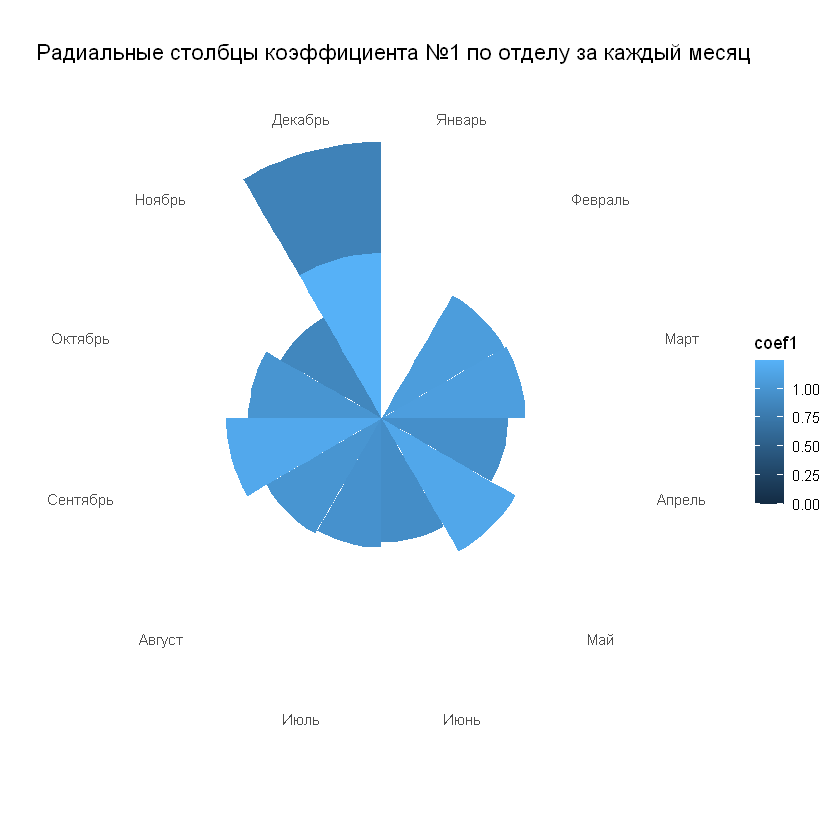

In [91]:
# Данный график визуально показывает, в какие месяцы коэффициент был высоким, а в какие низким или отсутствовал
# Подготовка данных по отделу за каждый месяц и визуализация
result$department_month %>%
  mutate(
    month_num = factor(match(month, c("Январь","Февраль","Март","Апрель","Май",
                                      "Июнь","Июль","Август","Сентябрь","Октябрь",
                                      "Ноябрь","Декабрь")),
                       levels = 1:12,
                       labels = c("Январь","Февраль","Март","Апрель","Май",
                                  "Июнь","Июль","Август","Сентябрь","Октябрь",
                                  "Ноябрь","Декабрь")),
    coef1 = ifelse(is.nan(coef1), 0, coef1),
    coef2 = ifelse(is.nan(coef2), 0, coef2)
  ) %>% 
  ggplot(aes(x = month_num, y = coef1, fill = coef1)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(start = 0) +
  theme_minimal() +
  labs(title = "Радиальные столбцы коэффициента №1 по отделу за каждый месяц", x = "", y = "") +
  theme(axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank())